In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#seeds = [10, 26, 31, 34, 44, 47, 67, 76, 86, 89]
#seeds = [7, 8, 12, 19, 30, 41, 43, 68, 71, 84]
#seeds = [2, 6, 8, 11, 14, 25, 27, 30, 39, 40, 45, 46, 47, 50, 52, 53, 55, 65, 77, 78, 82, 85, 86, 91, 93]
seeds = np.arange(100)

In [3]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [4]:
col_names = data.columns
X = data[col_names[3:]]
y = data[col_names[2]]

In [5]:
X_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns

In [6]:
pos_idxs = []
col_above = []

In [7]:
p = np.random.default_rng().permutation(len(X.columns))
print(X.columns[:10])
print(X.columns[p][:10])

Index(['MW', 'AMW', 'Mv', 'Mi', 'nTA', 'RBF', 'nDB', 'nAB', 'nN', 'nHet'], dtype='object')
Index(['GATS2p', 'CATS3D_06_AN', 'Mor09u', 'H-052', 'Wi_G/D', 'TDB04i',
       'Eig02_EA(ri)', 'VE2_RG', 'RBF', 'RDF040v'],
      dtype='object')


In [8]:
i = 0
for seed in seeds:
    i += 1
    #print('Seed: {}'.format(seed))
    rng = np.random.default_rng(seed=seed)
    for run in range(100):
        #print('Seed: {}, run: {}'.format(seed, run))
        X_scaled['random'] = rng.random(size=len(X_scaled))
        perm = rng.permutation(len(X_scaled.columns))
        X_perm = X_scaled[X_scaled.columns[perm]]
        rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, bootstrap=True, random_state=seed)
        rf.fit(X_perm, y)
        feature_importances_sorted, X_col_sorted = zip(*sorted(zip(rf.feature_importances_, X_perm.columns), reverse=True))
        pos_idxs.append(X_col_sorted.index('random'))
        col_above.append(X_perm.columns[:pos_idxs[-1]])
        #col_above += [col for col in X_scaled.columns[:pos_idxs[-1]]]
    print('{}% done'.format(i*100//len(seeds)))

1% done
2% done
3% done
4% done
5% done
6% done
7% done
8% done
9% done
10% done
11% done
12% done
13% done
14% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
22% done
23% done
24% done
25% done
26% done
27% done
28% done
29% done
30% done
31% done
32% done
33% done
34% done
35% done
36% done
37% done
38% done
39% done
40% done
41% done
42% done
43% done
44% done
45% done
46% done
47% done
48% done
49% done
50% done
51% done
52% done
53% done
54% done
55% done
56% done
57% done
58% done
59% done
60% done
61% done
62% done
63% done
64% done
65% done
66% done
67% done
68% done
69% done
70% done
71% done
72% done
73% done
74% done
75% done
76% done
77% done
78% done
79% done
80% done
81% done
82% done
83% done
84% done
85% done
86% done
87% done
88% done
89% done
90% done
91% done
92% done
93% done
94% done
95% done
96% done
97% done
98% done
99% done
100% done


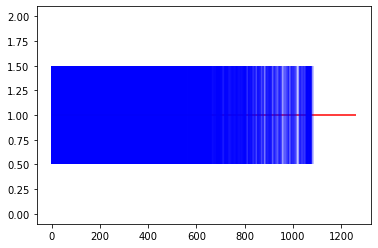

In [9]:
plt.figure()
plt.hlines(1,1, len(X_scaled.columns),colors='r')
plt.eventplot(pos_idxs, orientation='horizontal', colors='b', alpha=0.3)
plt.show()

In [10]:
col_names = [l for lst in col_above for l in lst ]
col_counts = Counter(col_names)

In [16]:
col_counts = {k: v/100 for k, v in sorted(col_counts.items(), key=lambda item: item[1], reverse=True)}
col_counts

{'MATS2p': 19.0,
 'E3p': 18.83,
 'VE1sign_B(s)': 18.82,
 'AVS_B(e)': 18.79,
 'B03[C-N]': 18.77,
 'HOMA': 18.76,
 'SpMin6_Bh(s)': 18.75,
 'SpMaxA_EA(bo)': 18.74,
 'SaaaC': 18.73,
 'G1e': 18.7,
 'RDF050s': 18.69,
 'G1m': 18.69,
 'R7m+': 18.69,
 'MPC07': 18.68,
 'L3u': 18.67,
 'CATS3D_03_AL': 18.66,
 'R5p+': 18.66,
 'G3m': 18.66,
 'R6p+': 18.65,
 'TDB01i': 18.64,
 'SpMax5_Bh(p)': 18.64,
 'MAXDN': 18.62,
 'RTe+': 18.59,
 'IC1': 18.58,
 'TDB05e': 18.58,
 'H6v': 18.58,
 'TDB05u': 18.57,
 'CATS3D_04_DD': 18.57,
 'WiA_D/Dt': 18.56,
 'X4Av': 18.56,
 'RDF020m': 18.56,
 'X5A': 18.55,
 'R6i+': 18.55,
 'nCbH': 18.55,
 'Mor09m': 18.55,
 'N%': 18.54,
 'DECC': 18.54,
 'Mor07m': 18.54,
 'HTi': 18.53,
 'RDF040s': 18.53,
 'E2m': 18.52,
 'MPC04': 18.52,
 'H6s': 18.52,
 'Mor27s': 18.52,
 'H5v': 18.51,
 'C-027': 18.5,
 'RTp': 18.49,
 'GATS2s': 18.49,
 'CATS2D_03_AN': 18.48,
 'R4p+': 18.48,
 'SHED_DD': 18.46,
 'RDF070u': 18.45,
 'H3v': 18.45,
 'SssssC': 18.45,
 'CATS2D_04_DA': 18.45,
 'CATS3D_04_AL': 18.44,


In [18]:
print(col_counts['random'], list(col_counts.keys()).index('random'))

17.96 488


<AxesSubplot:>

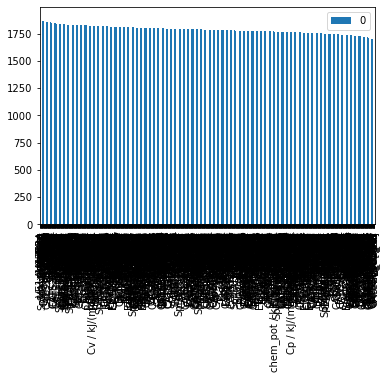

In [13]:
df = pd.DataFrame.from_dict(col_counts, orient='index')
df.plot(kind='bar')

In [14]:
len(col_counts.keys())

1261

In [19]:
number_of_features = 5
selected_features = []
for key in col_counts.keys():
    if len(selected_features) == number_of_features:
        break
    selected_features.append(key)
selected_features

['MATS2p', 'E3p', 'VE1sign_B(s)', 'AVS_B(e)', 'B03[C-N]']